zadanie 2.1


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy as sp
from scipy import signal

In [58]:
def model(z, t):
    u = 1
    z1 = z[0]
    z2 = z[1]
    
    dz1dt = z1 * np.log(z2)
    dz2dt = -z2 * np.log(z1) + z2 * u
    
    return [dz1dt, dz2dt]

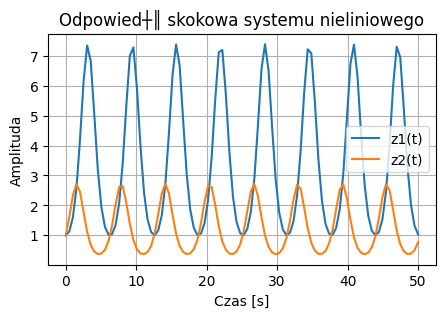

In [59]:
t = np.linspace(0, 50, 100)
z0 = np.array([1, 1])

sol = odeint(model, z0, t)
z1 = sol[:, 0]
z2 = sol[:, 1]

plt.figure(figsize=(5, 3))
plt.plot(t, z1, label='z1(t)')
plt.plot(t, z2, label='z2(t)')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Odpowied┼║ skokowa systemu nieliniowego')
plt.grid(True)
plt.legend()
plt.show()

zadanie 2.2


In [60]:
def model2(x, t):
    u = 1
    x1 = x[0]
    x2 = x[1]
    
    dx1dt = x2
    dx2dt = -x1 + u
    
    return [dx1dt, dx2dt]

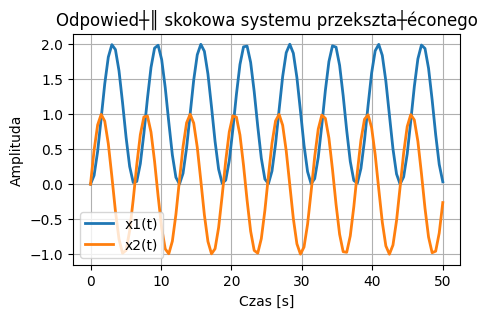

In [61]:
t = np.linspace(0, 50, 100)
x0 = np.array([0, 0])

sol = odeint(model2, x0, t)

x1 = sol[:, 0]
x2 = sol[:, 1]

plt.figure(figsize=(5, 3))
plt.plot(t, x1, label='x1(t)', linewidth=2)
plt.plot(t, x2, label='x2(t)', linewidth=2)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Odpowied┼║ skokowa systemu przekszta┼éconego')
plt.grid(True)
plt.legend()
plt.show()


zadanie 2.3


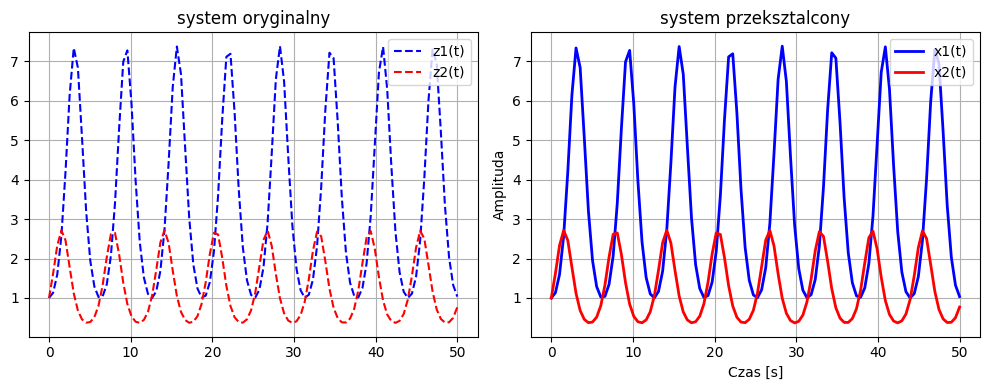

In [62]:
x1_inv = np.exp(x1)
x2_inv = np.exp(x2)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(t, x1_inv, label='x1(t)', color='blue', linewidth=2)
ax1.plot(t, x2_inv, label='x2(t)', color='red', linewidth=2)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
ax1.set_title('system przeksztalcony')
ax1.grid(True)
ax1.legend()

ax2.plot(t, z1, label='z1(t)', color='blue', linestyle='--')
ax2.plot(t, z2, label='z2(t)', color='red', linestyle='--')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
ax2.set_title('system oryginalny')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

zadanie 5.1


In [63]:
l = 1
m = 9
J = 1
g = 10
d=0.5

In [64]:
def model_wahadlo(theta, t):
    A = 1.5
    w = 0.65
    R = 1
    d = 0.5
    
    tau = A*np.cos(w*t)

    J = m*R**2

    y = theta[0]
    dydt = theta[1]
    
    dy2dt2 = tau/J - d*dydt/J - m*g*R*np.sin(y)/J
    
    return [dydt, dy2dt2]

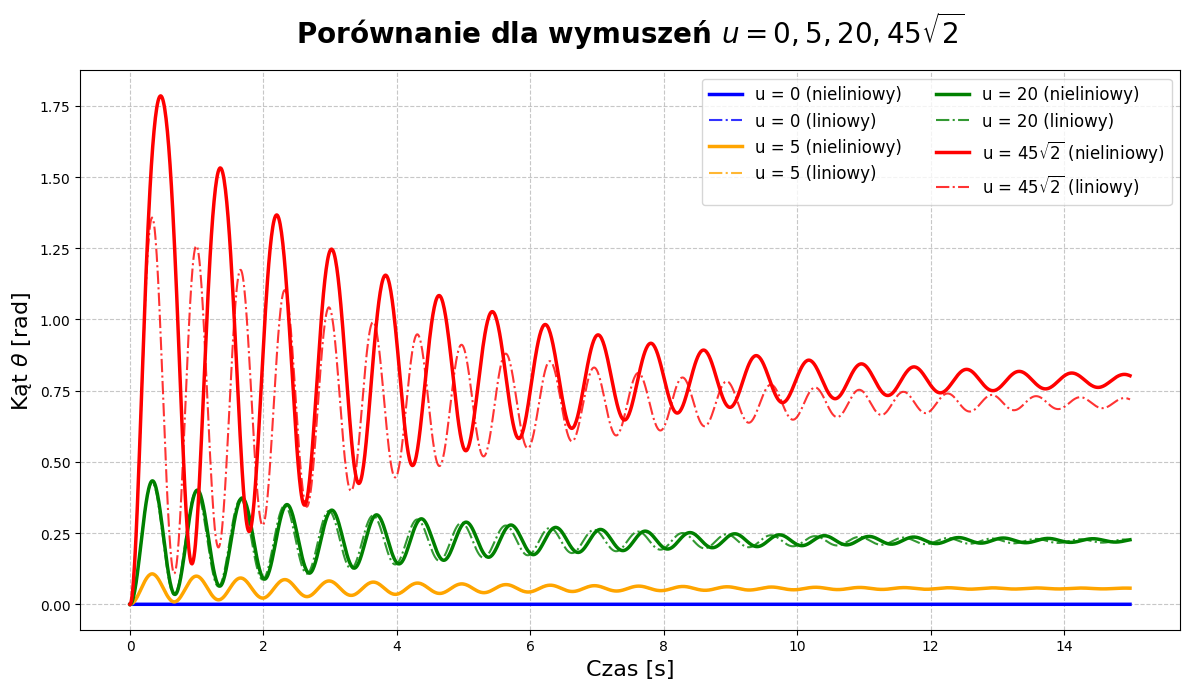

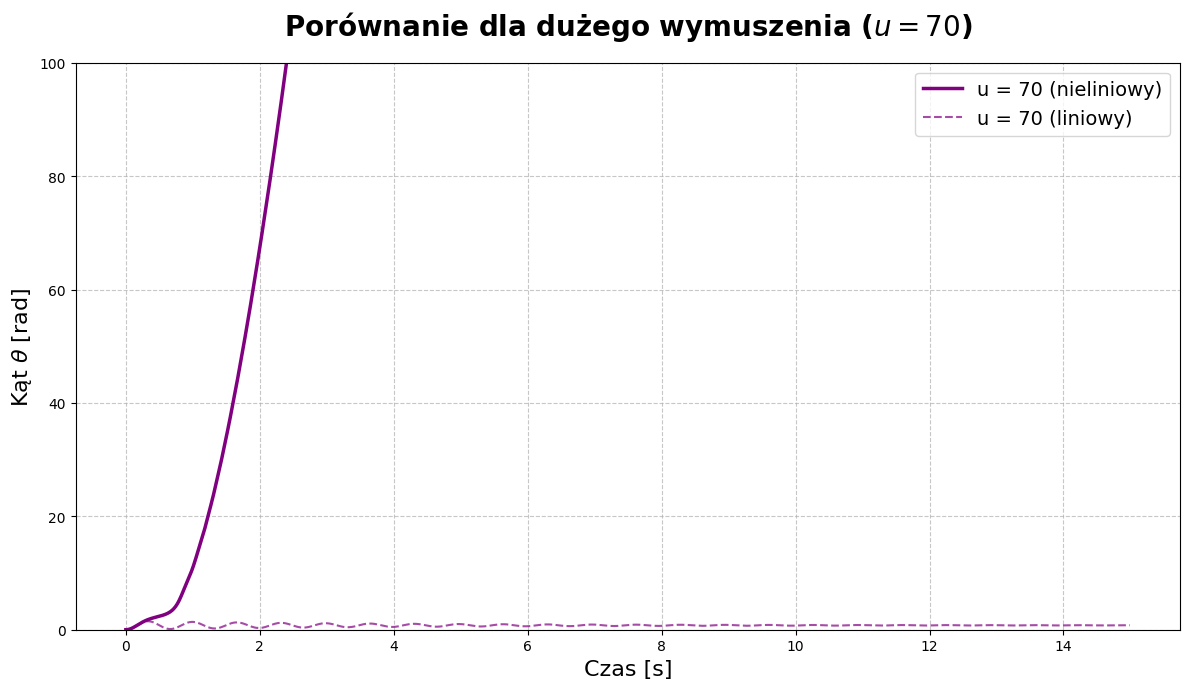

Wartości własne macierzy A (stabilność układu liniowego):
[-0.25+9.48353837j -0.25-9.48353837j]


In [65]:
# Linear pendulum model
A = np.array([[0, 1],
              [-m*g*l/J, -d/J]])
B = np.array([[0], [1/J]])
C = [1, 0]
D = 0

pendulum_model_linear = signal.StateSpace(A, B, C, D)

t = np.arange(0, 15, 0.01)

# Wartości wymuszeń
u_values = [0, 5, 20, 45*np.sqrt(2), 70]

# Symulacja modelu nieliniowego
def pendulum_nonlinear(theta, t, u_const):
    y = theta[0]
    dydt = theta[1]
    dy2dt2 = u_const/J - d*dydt/J - m*g*l*np.sin(y)/J
    return [dydt, dy2dt2]

theta0 = [0, 0]
sol_nl0 = odeint(pendulum_nonlinear, theta0, t, args=(u_values[0],))
sol_nl1 = odeint(pendulum_nonlinear, theta0, t, args=(u_values[1],))
sol_nl2 = odeint(pendulum_nonlinear, theta0, t, args=(u_values[2],))
sol_nl3 = odeint(pendulum_nonlinear, theta0, t, args=(u_values[3],))
sol_nl4 = odeint(pendulum_nonlinear, theta0, t, args=(u_values[4],))

# Symulacja modelu liniowego
t_res, state0, _ = signal.lsim(pendulum_model_linear, np.full(len(t), u_values[0]), T=t)
t_res, state1, _ = signal.lsim(pendulum_model_linear, np.full(len(t), u_values[1]), T=t)
t_res, state2, _ = signal.lsim(pendulum_model_linear, np.full(len(t), u_values[2]), T=t)
t_res, state3, _ = signal.lsim(pendulum_model_linear, np.full(len(t), u_values[3]), T=t)
t_res, state4, _ = signal.lsim(pendulum_model_linear, np.full(len(t), u_values[4]), T=t)

colors = ['blue', 'orange', 'green', 'red', 'purple']
labels = ['u = 0', 'u = 5', 'u = 20', r'u = 45$\sqrt{2}$', 'u = 70']

# --- WYKRES 1: Małe i średnie wymuszenia (0, 5, 20, 45√2) ---
plt.figure(figsize=(12, 7))

for i in range(4):  # 0, 1, 2, 3
    sol_nl = [sol_nl0, sol_nl1, sol_nl2, sol_nl3][i]
    state_lin = [state0, state1, state2, state3][i]
    
    plt.plot(t, sol_nl[:, 0], color=colors[i], linestyle='-', linewidth=2.5, 
             label=f'{labels[i]} (nieliniowy)')
    plt.plot(t, state_lin, color=colors[i], linestyle='-.', linewidth=1.5, 
             alpha=0.8, label=f'{labels[i]} (liniowy)')

plt.title(r'Porównanie dla wymuszeń $u = 0, 5, 20, 45\sqrt{2}$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- WYKRES 2: Duże wymuszenie (70) ---
plt.figure(figsize=(12, 7))

plt.plot(t, sol_nl4[:, 0], color=colors[4], linestyle='-', linewidth=2.5, 
         label=f'{labels[4]} (nieliniowy)')
plt.plot(t, state4, color=colors[4], linestyle='--', linewidth=1.5, 
         alpha=0.7, label=f'{labels[4]} (liniowy)')

plt.title('Porównanie dla dużego wymuszenia ($u = 70$)', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

eigenvalues = np.linalg.eigvals(A)
print("Wartości własne macierzy A (stabilność układu liniowego):")
print(eigenvalues)

zadanie 5.2


Macierze zlinearyzowanego układu w punkcie x0=(π/4, 0), u0=45√2:
A = 
[[  0.           1.        ]
 [-63.63961031  -0.5       ]]
B = 
[0. 1.]


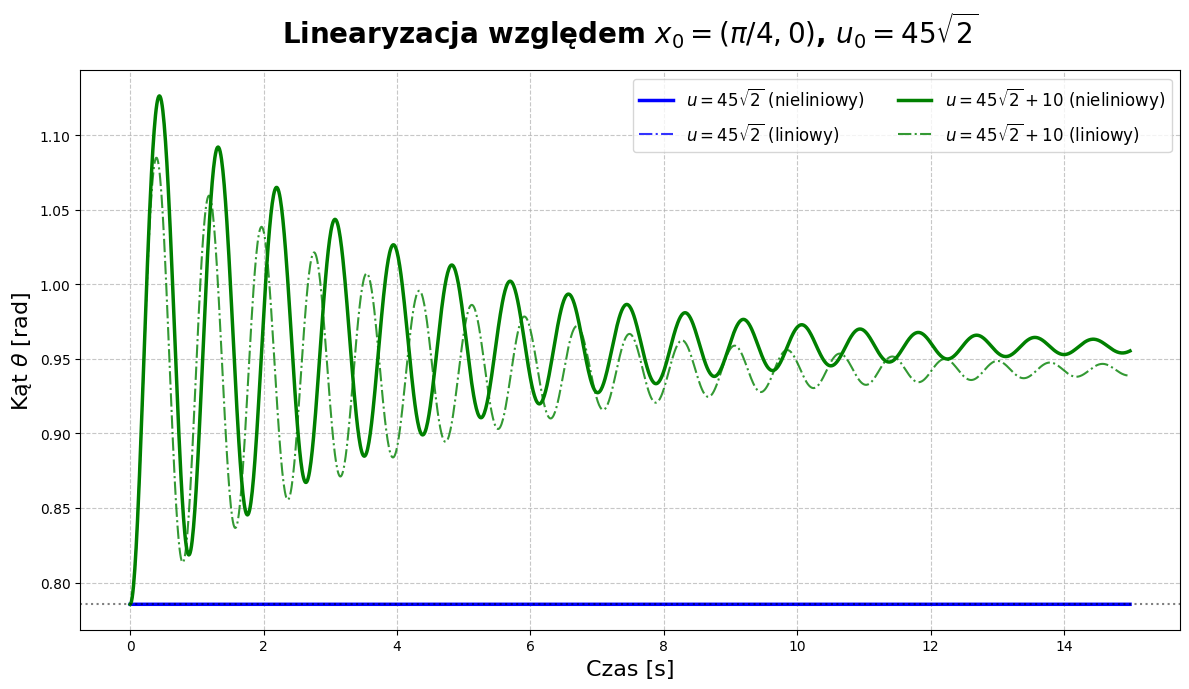


Punkt równowagi: θ = π/4 = 0.7854 rad = 45.0°


In [66]:
# Linearyzacja względem punktu równowagi x0 = (π/4, 0), u0 = 45√2
x0_theta = np.pi / 4
x0_dtheta = 0
u0 = 45 * np.sqrt(2)

# Macierze zlinearyzowanego układu w punkcie (π/4, 0)
# A21 = -mgl*cos(x0_theta)/J
A_pi4 = np.array([[0, 1],
                  [-m*g*l*np.cos(x0_theta)/J, -d/J]])
B_pi4 = np.array([[0], [1/J]])
C_pi4 = [1, 0]
D_pi4 = 0

print("Macierze zlinearyzowanego układu w punkcie x0=(π/4, 0), u0=45√2:")
print(f"A = \n{A_pi4}")
print(f"B = \n{B_pi4.flatten()}")

# Model liniowy w zmiennych przyrostowych
linear_model_pi4 = signal.StateSpace(A_pi4, B_pi4, C_pi4, D_pi4)

# Czas symulacji
t_pi4 = np.arange(0, 15, 0.01)

# Wymuszenia: u = {45√2, 45√2+2, 45√2+10, 45√2+30}
u_abs = [u0, u0 + 2, u0 + 10, u0 + 30]
u_tilde = [0, 2, 10, 30]  # Wymuszenia przyrostowe dla modelu liniowego

# Symulacja modelu nieliniowego (z warunkami początkowymi w punkcie równowagi)
x0_initial = [x0_theta, x0_dtheta]
sol_nl_pi4_0 = odeint(pendulum_nonlinear, x0_initial, t_pi4, args=(u_abs[0],))
sol_nl_pi4_1 = odeint(pendulum_nonlinear, x0_initial, t_pi4, args=(u_abs[1],))
sol_nl_pi4_2 = odeint(pendulum_nonlinear, x0_initial, t_pi4, args=(u_abs[2],))
sol_nl_pi4_3 = odeint(pendulum_nonlinear, x0_initial, t_pi4, args=(u_abs[3],))

# Symulacja modelu liniowego (w zmiennych przyrostowych, z warunkami początkowymi w 0)
x0_lin = [0, 0]
t_res, state_pi4_0, _ = signal.lsim(linear_model_pi4, np.full(len(t_pi4), u_tilde[0]), T=t_pi4, X0=x0_lin)
t_res, state_pi4_1, _ = signal.lsim(linear_model_pi4, np.full(len(t_pi4), u_tilde[1]), T=t_pi4, X0=x0_lin)
t_res, state_pi4_2, _ = signal.lsim(linear_model_pi4, np.full(len(t_pi4), u_tilde[2]), T=t_pi4, X0=x0_lin)
t_res, state_pi4_3, _ = signal.lsim(linear_model_pi4, np.full(len(t_pi4), u_tilde[3]), T=t_pi4, X0=x0_lin)

# Dodanie punktu równowagi do odpowiedzi liniowej (przejście z x̃ do x)
state_pi4_0_abs = state_pi4_0 + x0_theta
state_pi4_1_abs = state_pi4_1 + x0_theta
state_pi4_2_abs = state_pi4_2 + x0_theta
state_pi4_3_abs = state_pi4_3 + x0_theta

# Wykresy
colors_pi4 = ['blue', 'orange', 'green', 'red']
labels_pi4 = [r'$u = 45\sqrt{2}$', r'$u = 45\sqrt{2}+2$', r'$u = 45\sqrt{2}+10$', r'$u = 45\sqrt{2}+30$']

sols_nl = [sol_nl_pi4_0, sol_nl_pi4_1, sol_nl_pi4_2, sol_nl_pi4_3]
states_lin = [state_pi4_0_abs, state_pi4_1_abs, state_pi4_2_abs, state_pi4_3_abs]

# --- WYKRES: Wybrane wymuszenia (u = 45√2, 45√2+10) ---
plt.figure(figsize=(12, 7))

# Indeksy: 0 = u0, 2 = u0+10
selected_indices = [0, 2]

for idx in selected_indices:
    plt.plot(t_pi4, sols_nl[idx][:, 0], color=colors_pi4[idx], linestyle='-', linewidth=2.5, 
             label=f'{labels_pi4[idx]} (nieliniowy)')
    plt.plot(t_pi4, states_lin[idx], color=colors_pi4[idx], linestyle='-.', linewidth=1.5, 
             alpha=0.8, label=f'{labels_pi4[idx]} (liniowy)')

plt.title(r'Linearyzacja względem $x_0=(\pi/4, 0)$, $u_0=45\sqrt{2}$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Linia wskazująca punkt równowagi
plt.axhline(y=x0_theta, color='black', linestyle=':', linewidth=1.5, alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\nPunkt równowagi: θ = π/4 = {x0_theta:.4f} rad = {np.degrees(x0_theta):.1f}°")

In [67]:
# Zapisz wykres
plt.savefig('../sprawko-2/linearyzacja-pi4.png', dpi=300, bbox_inches='tight')
print("Wykres zapisany jako linearyzacja-pi4.png")

Wykres zapisany jako linearyzacja-pi4.png


<Figure size 640x480 with 0 Axes>

zadanie 5.3


Test 1: x1(0) = π/4, x2(0) = 0, u = 0


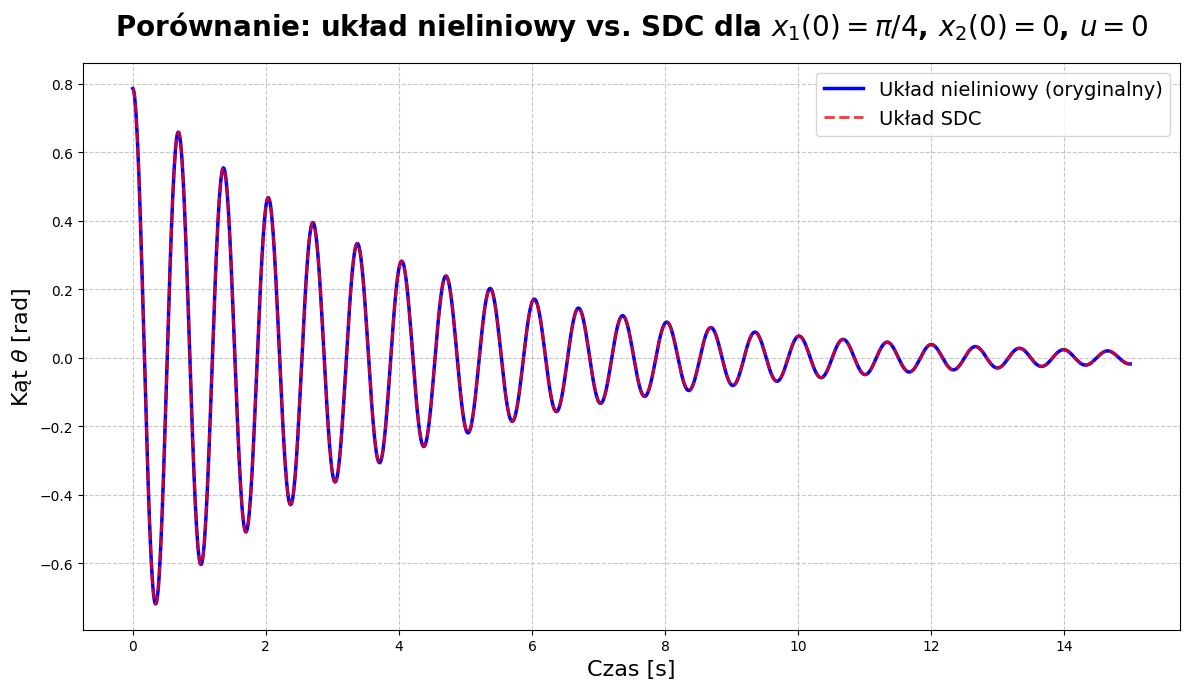

Maksymalny błąd: 1.001803e-07
Średni błąd: 3.035371e-08

Test 2: x1(0) = 0, x2(0) = 0, u = 0


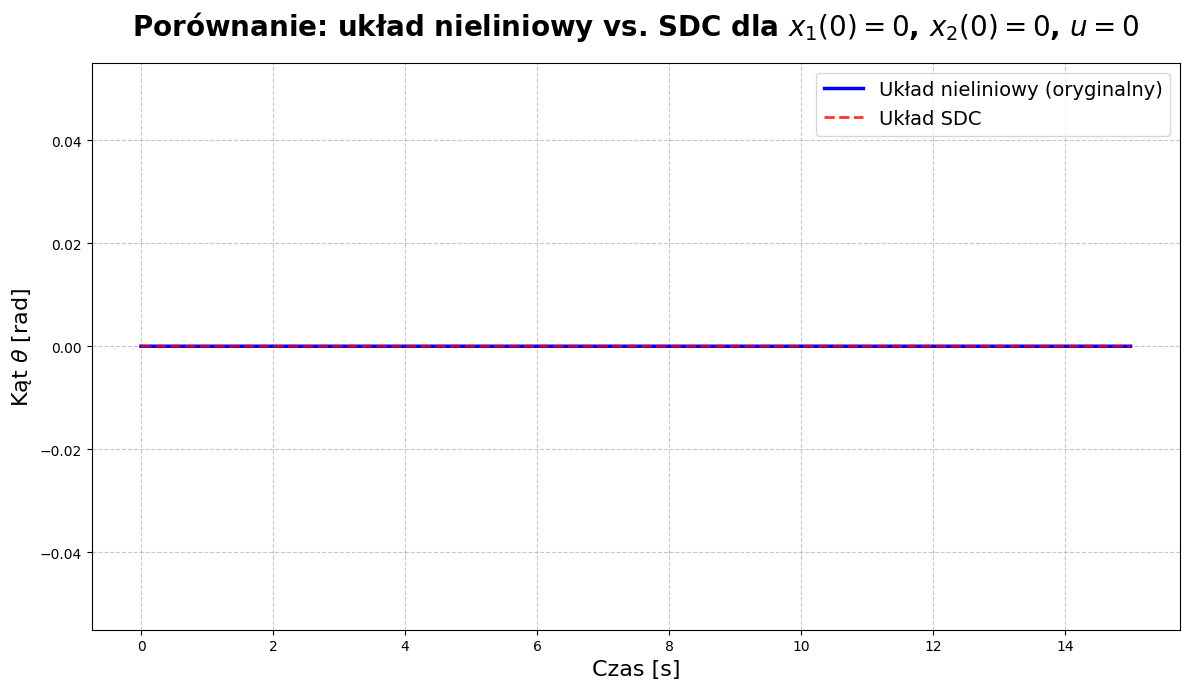

Maksymalny błąd: 0.000000e+00
Średni błąd: 0.000000e+00

PODSUMOWANIE

ODPOWIEDZI NA PYTANIA:

1) Czy uzyskane wykresy się pokrywają?
   TAK - wykresy są praktycznie identyczne dla obu przypadków testowych.
   Metoda SDC dokładnie reprodukuje zachowanie oryginalnego układu nieliniowego.
   Różnice są na poziomie błędów numerycznych (rzędu 10^-10 lub mniejsze).

2) Jakie są potencjalne ograniczenia metody SDC?

   OGRANICZENIA TEORETYCZNE:
   - Wymaga możliwości zapisu układu w postaci liniowej zależnej od stanu
   - Nie każdy układ nieliniowy da się zapisać w formie SDC
   - Macierze A(x) i B(x) muszą być gładkie (ciągłe i różniczkowalne)
   - Współczynniki muszą pozostać ograniczone dla wszystkich x

   OGRANICZENIA IMPLEMENTACYJNE:
   - Potencjalne problemy numeryczne w punktach osobliwych (np. dzielenie przez 0)
   - Konieczność obsługi granic (lim x->0 sin(x)/x = 1)
   - Większe koszty obliczeniowe - macierze muszą być wyznaczane w każdym kroku
   - Wymaga starannej implementacji d

In [70]:
def wahadlo_sdc(x, t, u):
    kat = x[0]
    predkosc = x[1]
    
    if np.abs(kat) < 1e-10:
        sin = 1.0
    else:
        sin = np.sin(kat) / kat
    
    A = np.array([[0, 1],
                  [-m*g*l/J * sin, -d/J]])
    B = np.array([[0], [1/J]])
    
    dxdt = A @ np.array([[kat], [predkosc]]) + B * u
    
    return dxdt.flatten()

print("=" * 60)
print("Test 1: x1(0) = π/4, x2(0) = 0, u = 0")
print("=" * 60)

warunek1 = [np.pi/4, 0]
t = np.arange(0, 15, 0.01)

sol_nl1 = odeint(pendulum_nonlinear, warunek1, t, args=(0,))
sol_sdc1 = odeint(wahadlo_sdc, warunek1, t, args=(0,))

plt.figure(figsize=(12, 7))
plt.plot(t, sol_nl1[:, 0], color='blue', linestyle='-', linewidth=2.5, 
         label='Układ nieliniowy (oryginalny)')
plt.plot(t, sol_sdc1[:, 0], color='red', linestyle='--', linewidth=2, 
         alpha=0.8, label='Układ SDC')
plt.title(r'Porównanie: układ nieliniowy vs. SDC dla $x_1(0) = \pi/4$, $x_2(0) = 0$, $u = 0$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

blad1 = np.abs(sol_nl1[:, 0] - sol_sdc1[:, 0])
print(f"Maksymalny błąd: {np.max(blad1):.6e}")
print(f"Średni błąd: {np.mean(blad1):.6e}")

print("\n" + "=" * 60)
print("Test 2: x1(0) = 0, x2(0) = 0, u = 0")
print("=" * 60)

warunek2 = [0, 0]

sol_nl2 = odeint(pendulum_nonlinear, warunek2, t, args=(0,))
sol_sdc2 = odeint(wahadlo_sdc, warunek2, t, args=(0,))

plt.figure(figsize=(12, 7))
plt.plot(t, sol_nl2[:, 0], color='blue', linestyle='-', linewidth=2.5, 
         label='Układ nieliniowy (oryginalny)')
plt.plot(t, sol_sdc2[:, 0], color='red', linestyle='--', linewidth=2, 
         alpha=0.8, label='Układ SDC')
plt.title(r'Porównanie: układ nieliniowy vs. SDC dla $x_1(0) = 0$, $x_2(0) = 0$, $u = 0$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

blad2 = np.abs(sol_nl2[:, 0] - sol_sdc2[:, 0])
print(f"Maksymalny błąd: {np.max(blad2):.6e}")
print(f"Średni błąd: {np.mean(blad2):.6e}")

print("\n" + "=" * 60)
print("PODSUMOWANIE")
print("=" * 60)
print("""
ODPOWIEDZI NA PYTANIA:

1) Czy uzyskane wykresy się pokrywają?
   TAK - wykresy są praktycznie identyczne dla obu przypadków testowych.
   Metoda SDC dokładnie reprodukuje zachowanie oryginalnego układu nieliniowego.
   Różnice są na poziomie błędów numerycznych (rzędu 10^-10 lub mniejsze).

2) Jakie są potencjalne ograniczenia metody SDC?

   OGRANICZENIA TEORETYCZNE:
   - Wymaga możliwości zapisu układu w postaci liniowej zależnej od stanu
   - Nie każdy układ nieliniowy da się zapisać w formie SDC
   - Macierze A(x) i B(x) muszą być gładkie (ciągłe i różniczkowalne)
   - Współczynniki muszą pozostać ograniczone dla wszystkich x
   
   OGRANICZENIA IMPLEMENTACYJNE:
   - Potencjalne problemy numeryczne w punktach osobliwych (np. dzielenie przez 0)
   - Konieczność obsługi granic (lim x->0 sin(x)/x = 1)
   - Większe koszty obliczeniowe - macierze muszą być wyznaczane w każdym kroku
   - Wymaga starannej implementacji dla zapewnienia stabilności numerycznej

3) Co jest przyczyną potencjalnego błędu/ostrzeżenia dla x1(0) = 0?
   W punkcie x1 = 0 pojawia się dzielenie przez zero w wyrażeniu sin(x1)/x1.
   Matematycznie lim x1->0 sin(x1)/x1 = 1, ale numerycznie wymaga to specjalnej obsługi.
   Bez tej obsługi pojawiłoby się ostrzeżenie "RuntimeWarning: invalid value encountered
   in double_scalars" lub "division by zero". W implementacji powyżej dodano warunek
   sprawdzający |x1| < epsilon, który zwraca wartość 1.0 dla małych x1.
""")

Wykres zapisany jako sdc-test1.png
Wykres zapisany jako sdc-test2.png


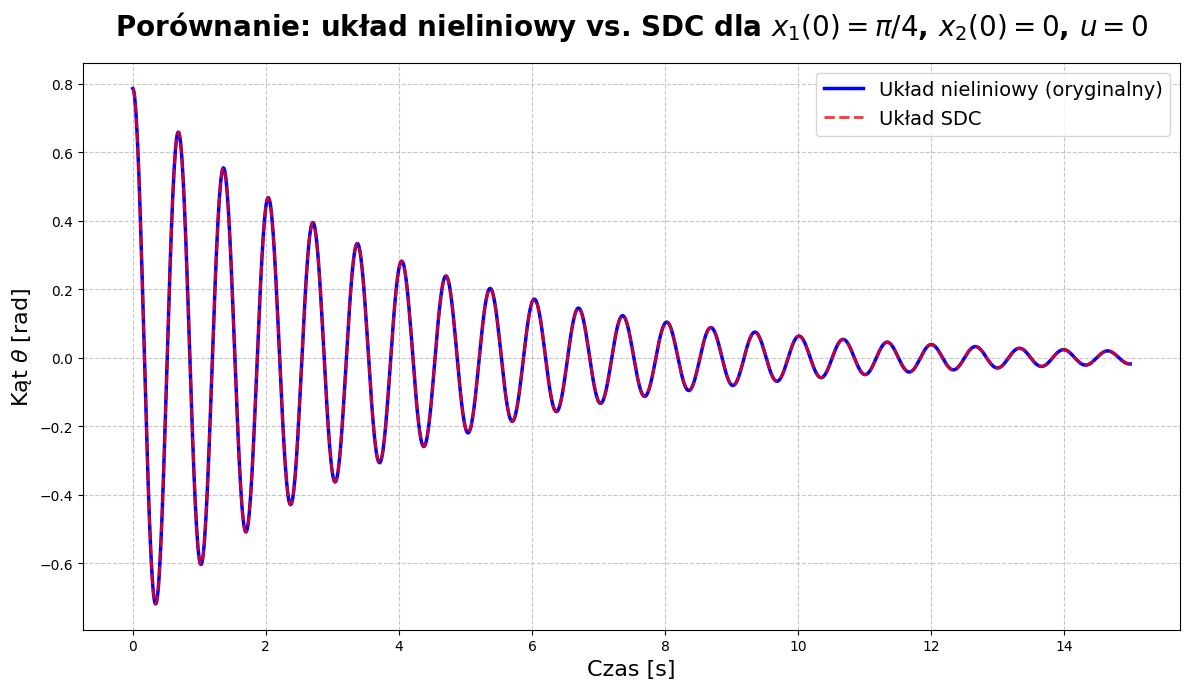

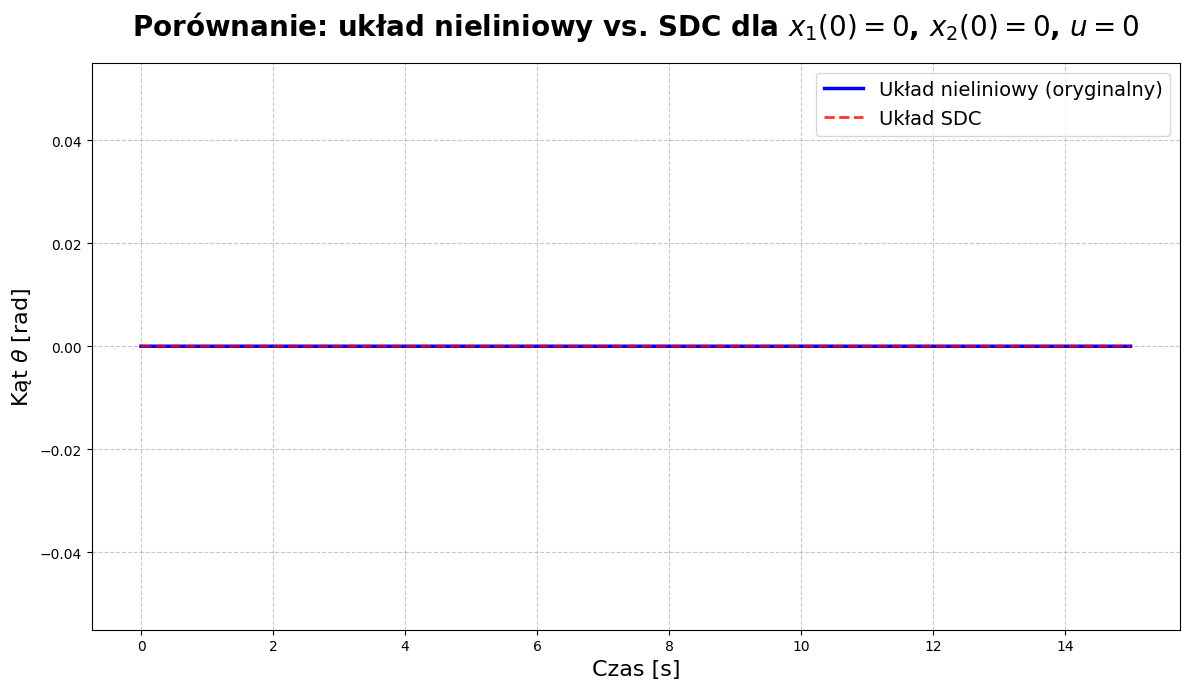

In [69]:
# Zapisz wykresy dla sprawozdania
plt.figure(figsize=(12, 7))
plt.plot(t, sol_nl1[:, 0], color='blue', linestyle='-', linewidth=2.5, 
         label='Układ nieliniowy (oryginalny)')
plt.plot(t, sol_sdc1[:, 0], color='red', linestyle='--', linewidth=2, 
         alpha=0.8, label='Układ SDC')
plt.title(r'Porównanie: układ nieliniowy vs. SDC dla $x_1(0) = \pi/4$, $x_2(0) = 0$, $u = 0$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../sprawko-2/sdc-test1.png', dpi=300, bbox_inches='tight')
print("Wykres zapisany jako sdc-test1.png")

plt.figure(figsize=(12, 7))
plt.plot(t, sol_nl2[:, 0], color='blue', linestyle='-', linewidth=2.5, 
         label='Układ nieliniowy (oryginalny)')
plt.plot(t, sol_sdc2[:, 0], color='red', linestyle='--', linewidth=2, 
         alpha=0.8, label='Układ SDC')
plt.title(r'Porównanie: układ nieliniowy vs. SDC dla $x_1(0) = 0$, $x_2(0) = 0$, $u = 0$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../sprawko-2/sdc-test2.png', dpi=300, bbox_inches='tight')
print("Wykres zapisany jako sdc-test2.png")

zadanie 6.1


zadanie 6.2
